In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree 예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#로지스틱 회귀분석
from statsmodels.api import Logit

# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#평가함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 

In [2]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/HMEQ.csv", engine = "python", encoding="CP949")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols : 
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

REASON : 2
JOB : 6


In [5]:
df_raw["JOB"].fillna("Other", inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [6]:
df_raw['JOB'].value_counts()

Other      1525
ProfExe     929
Office      623
Mgr         477
Self        130
Sales        64
Name: JOB, dtype: int64

In [7]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [8]:
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace =False)
df_raw_y = df_raw_dummy["BAD"]

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [10]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}\n".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(gb_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.963

Accuracy on test set: 0.941



In [11]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [15]:
train_accuracy = []; test_accuracy = []

para_lr = [lr * 0.1 for lr in range (1,10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["Learning Rate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy


df_accuracy_lr["D"] = df_accuracy_lr["TrainAccuracy"]-df_accuracy_lr["TestAccuracy"]

df_accuracy_lr.round(3)

,Learning Rate,TrainAccuracy,TestAccuracy,D
0,0.1,0.963,0.941,0.022
1,0.2,0.984,0.940,0.044
2,0.3,0.994,0.939,0.055
3,0.4,0.999,0.944,0.055
4,0.5,1.000,0.934,0.066
5,0.6,1.000,0.937,0.063
6,0.7,1.000,0.941,0.059
7,0.8,0.999,0.931,0.069
8,0.9,1.000,0.937,0.063


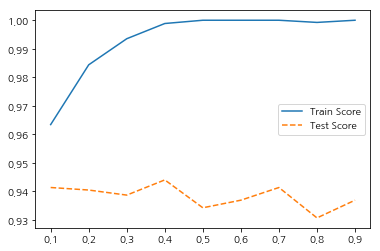

In [16]:
plt.plot(para_lr, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [18]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range (1,16)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy


df_accuracy_n["D"] = df_accuracy_n["TrainAccuracy"]-df_accuracy_n["TestAccuracy"]

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,D
0,10,0.933,0.928,0.005
1,20,0.939,0.932,0.007
2,30,0.947,0.936,0.011
3,40,0.952,0.940,0.012
4,50,0.956,0.940,0.016
5,60,0.957,0.940,0.016
6,70,0.957,0.940,0.018
7,80,0.960,0.940,0.020
8,90,0.961,0.940,0.021
9,100,0.963,0.941,0.022


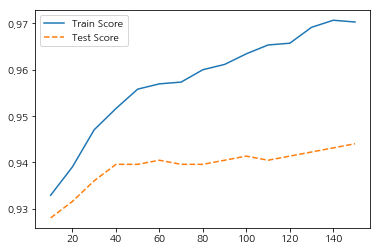

In [19]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [20]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range (1,11)]

for v_max_depth in para_depth :
    gb = GradientBoostingClassifier(max_depth = v_max_depth, learning_rate=0.1, n_estimators=100, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


df_accuracy_depth["D"] = df_accuracy_depth["TrainAccuracy"]-df_accuracy_depth["TestAccuracy"]

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,D
0,1,0.936,0.935,0.001
1,2,0.951,0.940,0.011
2,3,0.963,0.941,0.022
3,4,0.979,0.945,0.034
4,5,0.992,0.941,0.050
5,6,0.998,0.949,0.049
6,7,1.000,0.946,0.054
7,8,1.000,0.948,0.052
8,9,1.000,0.948,0.052
9,10,1.000,0.947,0.053


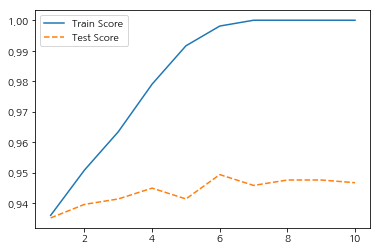

In [21]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [26]:
v_feature_name = df_train_x.columns

In [28]:
train_accuracy = []; test_accuracy = []

para_split = [n_split *10 for n_split in range (2,11)]

for v_min_samples_split in para_split :
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, learning_rate=0.1, max_depth = 4, n_estimators=100, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy


df_accuracy_split["D"] = df_accuracy_split["TrainAccuracy"]-df_accuracy_split["TestAccuracy"]

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy,D
0,20,0.976,0.942,0.034
1,30,0.974,0.942,0.032
2,40,0.973,0.937,0.036
3,50,0.969,0.941,0.027
4,60,0.973,0.941,0.031
5,70,0.969,0.943,0.026
6,80,0.968,0.943,0.025
7,90,0.966,0.941,0.024
8,100,0.963,0.940,0.024


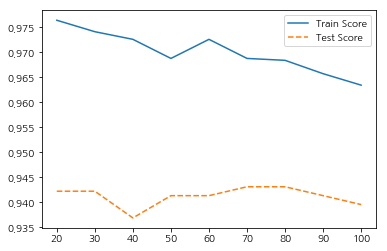

In [29]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [30]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf *10 for n_leaf in range (1,11)]

for v_min_samples_leaf in para_leaf :
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, learning_rate=0.1, max_depth = 4, n_estimators=100, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy


df_accuracy_leaf["D"] = df_accuracy_leaf["TrainAccuracy"]-df_accuracy_leaf["TestAccuracy"]

df_accuracy_leaf.round(3)

,MinSamplesleaf,TrainAccuracy,TestAccuracy,D
0,10,0.977,0.946,0.031
1,20,0.970,0.942,0.028
2,30,0.970,0.942,0.028
3,40,0.963,0.940,0.023
4,50,0.960,0.942,0.018
5,60,0.958,0.939,0.020
6,70,0.958,0.937,0.021
7,80,0.955,0.940,0.015
8,90,0.950,0.936,0.014
9,100,0.948,0.938,0.010


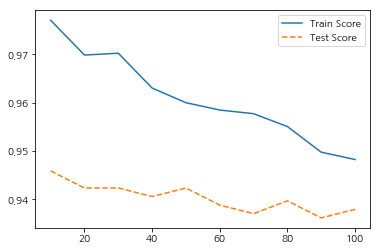

In [31]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [32]:
gb_final = GradientBoostingClassifier(random_state = 1234, max_depth=4, min_samples_leaf=10, n_estimators = 100, learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [34]:
y_pred = gb_final.predict(df_test_x)

print("Accuracy on training set: {0:.3f}\n".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.977

Accuracy on test set: 0.946

Confusion Matrix: 
[[1018    3]
 [  58   46]]


In [35]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.327
6,CLAGE,0.120
2,VALUE,0.107
8,CLNO,0.105
5,DELINQ,0.100
0,LOAN,0.072
1,MORTDUE,0.041
7,NINQ,0.038
4,DEROG,0.034
3,YOJ,0.033


Text(0, 0.5, '변수')

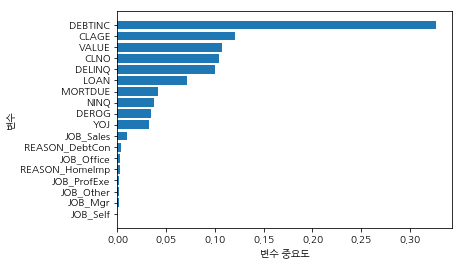

In [36]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [37]:
estimator = GradientBoostingClassifier()

param_grid = {"learning_rate":para_lr, "max_depth":para_depth, "min_samples_leaf":para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score:\n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.6000000000000001, loss='deviance',
              max_depth=7, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

best parameter: 
{'learning_rate': 0.6000000000000001, 'max_depth': 7, 'min_samples_leaf': 10}

best score:
0.95
